<a href="https://colab.research.google.com/github/sambhav3009/Image-Preprocessing/blob/main/Image_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **Image Processing CV (Computer Vision)**

In [1]:
# Importing Necessaary Libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [9]:
img_path = "/content/curved-forest-road-free-photo.webp"
img = cv2.imread(img_path)
print(img.shape)

(399, 599, 3)


## **1.1 Converting Image to Grayscale**

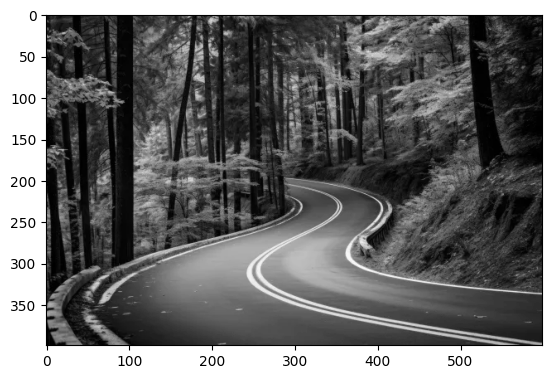

(399, 599)


In [5]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()
print(gray_image.shape)

## **1.2 Cropping Image**

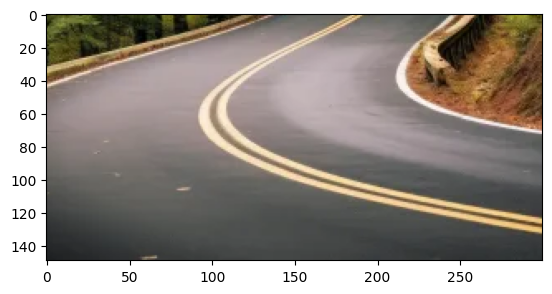

In [15]:
# Define the coordinates of the region of interest (ROI)
x = 150  # starting x coordinate of the ROI
y = 250  # starting y coordinate of the ROI
width = 300  # width of the ROI
height = 400  # height of the ROI
# Crop the image using the ROI coordinates
cropped_img = img[y:y+height, x:x+width]
# Display the cropped image using matplotlib
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('on')
plt.show()

## **1.3 Thresholding the Image**

Thresholding is a technique used to separate pixels into two categories based on a specified threshold value.

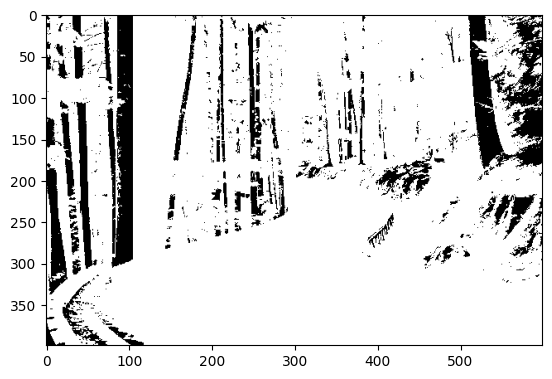

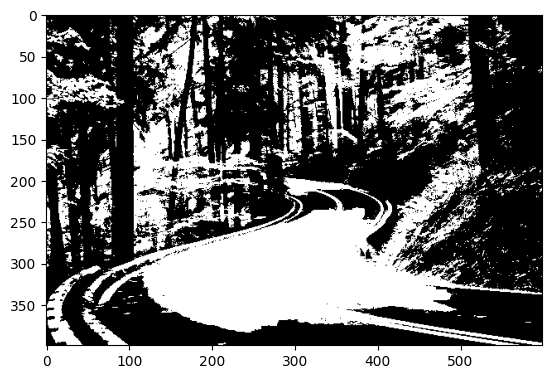

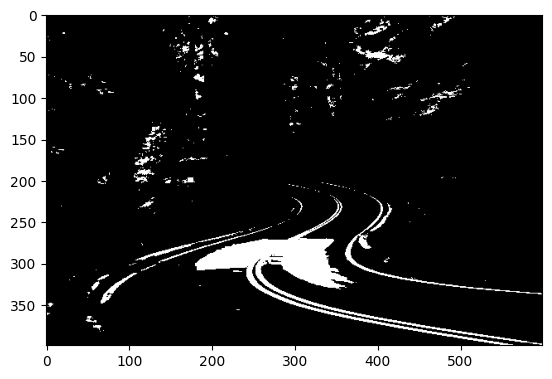

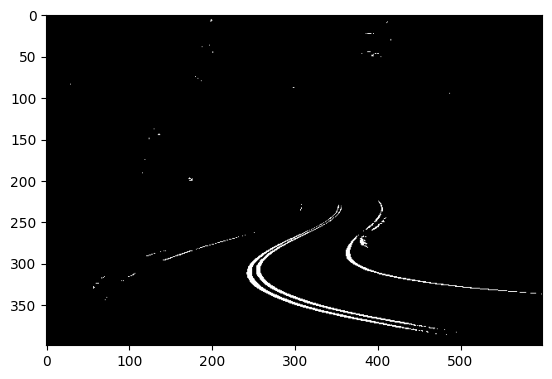

In [17]:
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 20, 255, cv2.THRESH_BINARY)
'''Thresholding is performed with a threshold value of 20.
Pixels with intensity values less than 20 are set to 0 (black), and pixels with
intensity values greater than or equal to 20 are set to 255 (white). '''
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 80, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 160, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()


## **1.4 Bluring the Image**

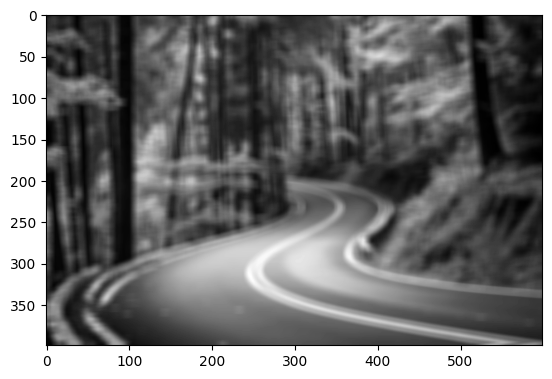

In [23]:
output2 = cv2.blur(gray_image, (10, 10)) #Using the inbuilt Bluring function
plt.imshow(output2, cmap='gray')
plt.show()

## **1.5 Gaussian Blur**

The blur function uses a simple averaging filter, while the GaussianBlur function applies a Gaussian filter that weights the pixels differently. The GaussianBlur function generally produces better results with smoother blurring and better preservation of image details.

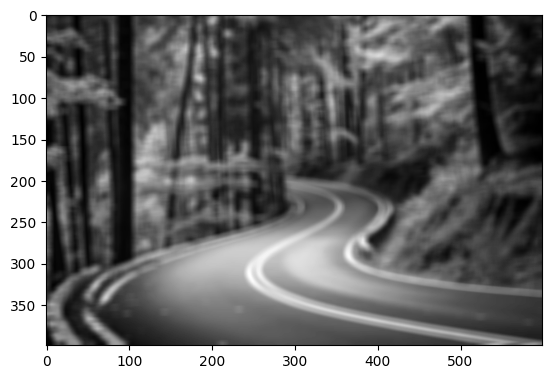

In [26]:
output2 = cv2.GaussianBlur(gray_image, (9, 9), 10)   #(9,9) -> represents the kernel size and 10 represents standard deviation
plt.imshow(output2, cmap='gray')
plt.show()

## **1.6 Rotating and Scaling of the image**

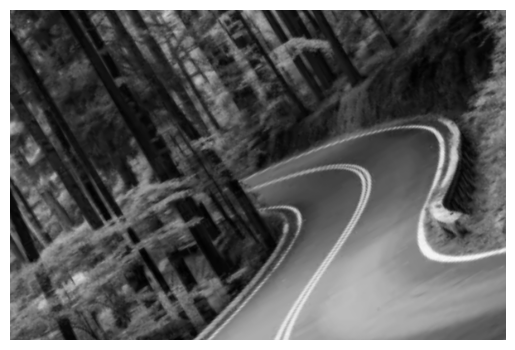

In [29]:
# Define the rotation angle and scale factor
angle = 30
scale = 2.0
# Get the image dimensions
(h, w) = img.shape[:2]
# Calculate the center point of the image
center = (w // 2, h // 2)
# Define the rotation matrix
M = cv2.getRotationMatrix2D(center, angle, scale)
# Apply the rotation to the image
rotated_img = cv2.warpAffine(gray_image, M, (w, h))
# Display the rotated image
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## **1.7 (a) Canny with Gaussian Blur**

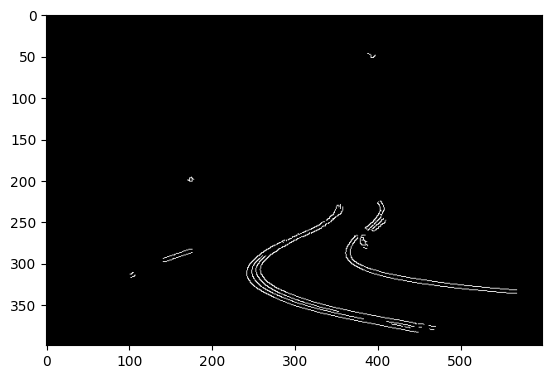

In [31]:
img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, output2) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
output2 = cv2.GaussianBlur(output2, (5, 5), 3)
output2 = cv2.Canny(output2, 180, 255)
'''It applies the Canny edge detection algorithm, which identifies edges based on gradient intensity.
The specified thresholds of 180 and 255 determine the minimum and maximum
gradient values for an edge to be considered.'''
plt.imshow(output2,cmap='gray')
plt.show()

## **1.7 (b) Canny without Gaussian Blur**

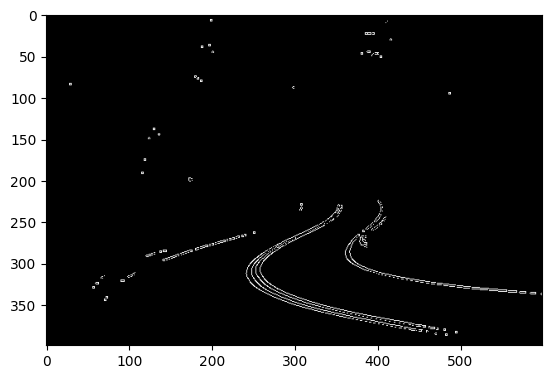

In [32]:
img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, output2) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
output2 = cv2.Canny(output2, 180, 255)
plt.imshow(output2,cmap='gray')
plt.show()

## **1.8 Home work**

Work upon what is hough lines transformation?

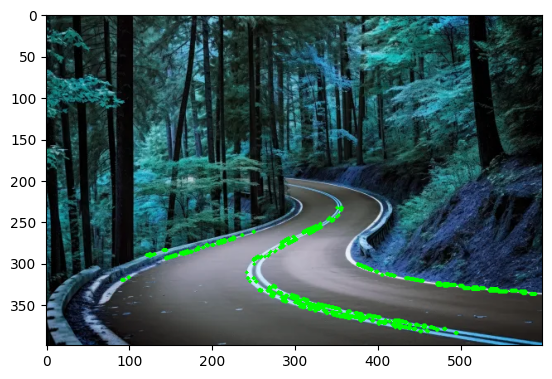

In [33]:
lines = cv2.HoughLinesP(output2, 1, np.pi/180,30)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),4)
plt.imshow(img)

# **2 Basic Image Processing using Scikit Image**

## **2.1 Importing library and reading the type of data**

In [40]:
from skimage.io import imread  # pip install scikit-image
image = imread("/content/rose.jpeg")
type(image)

numpy.ndarray

## **2.2 Printing the image in the form of matrix**

In [42]:
# Printing Image in the form of Matrix
import numpy as np
image = imread("/content/rose.jpeg")
image_matrix = np.array(image)
print("Image matrix:")
print(image_matrix)

Image matrix:
[[[127 125 136]
  [128 126 137]
  [129 127 138]
  ...
  [ 81  80  85]
  [ 81  80  85]
  [ 82  81  86]]

 [[125 123 134]
  [126 124 135]
  [128 126 137]
  ...
  [ 81  80  85]
  [ 81  80  85]
  [ 82  81  86]]

 [[124 122 133]
  [124 122 133]
  [125 123 134]
  ...
  [ 81  80  85]
  [ 81  80  85]
  [ 81  80  85]]

 ...

 [[ 15  14  20]
  [ 11  10  16]
  [  8   7  13]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[ 15  14  20]
  [ 11  10  16]
  [  8   7  13]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[ 15  14  20]
  [ 11  10  16]
  [  8   7  13]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]]


## **2.3 Printing the shape of the matrix**

In [43]:
image.shape #(612*490*3)

(275, 183, 3)

## **2.4 Printing the number of chanels in a image**

In [44]:
image.ndim

3

## **2.4 The number of pixels**

In [45]:
image.size  # 612 * 490 * 3

150975

## **2.5 Printing the red Channel of the Image**

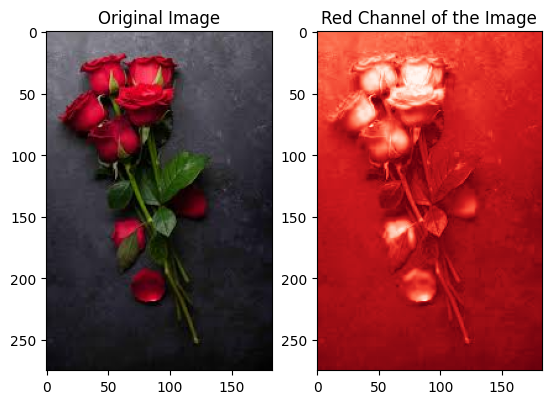

In [46]:
import matplotlib.pyplot as plt
red = image[:, :, 0]
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(red, cmap='Reds_r')
plt.title("Red Channel of the Image")
plt.show()

## **2.6 Printing the Green Channel of the Image**

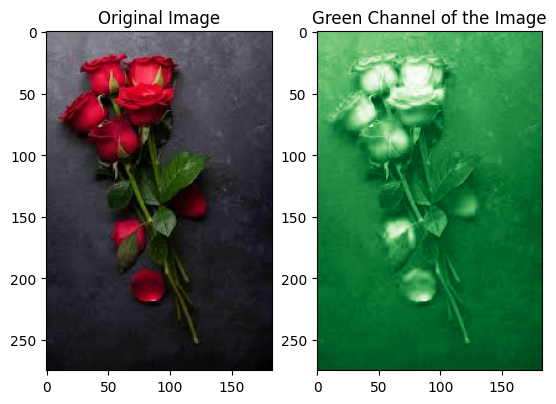

In [47]:
import matplotlib.pyplot as plt
green = image[:, :, 1]
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(red, cmap='Greens_r')
plt.title("Green Channel of the Image")
plt.show()

## **2.7 Printing the Blue Channel of the Image**

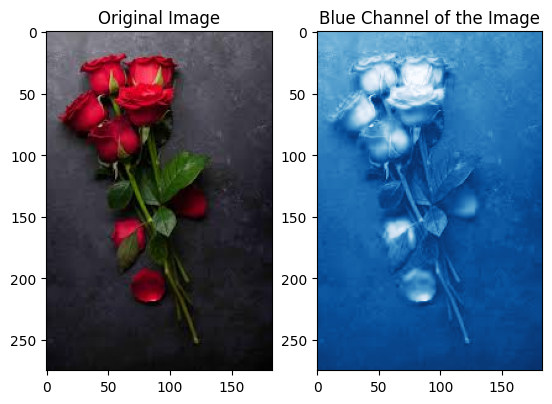

In [48]:
import matplotlib.pyplot as plt
Blue = image[:, :, 2]
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(red, cmap='Blues_r')
plt.title("Blue Channel of the Image")
plt.show()

## **2.8 Printing the image on axis**

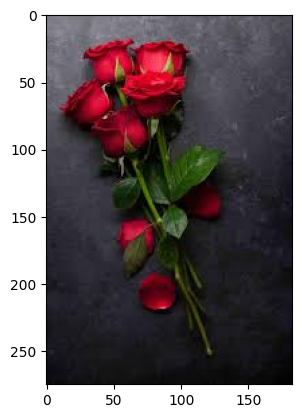

In [49]:
plt.imshow(image)
plt.axis('on')  # Enable the axis
plt.show()

## **2.8 Printing the Grayscale of the Image**

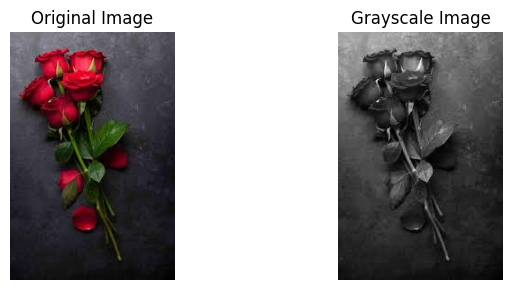

In [52]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread
def compare(image1, image2, title1, title2):
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(image1)
    plt.title(title1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image2, cmap='gray')
    plt.title(title2)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
image = imread("/content/rose.jpeg")
gray = rgb2gray(image)
compare(image, gray, "Original Image", "Grayscale Image")


In [53]:
gray.shape

(275, 183)

## **2.9 Flipping the Image**

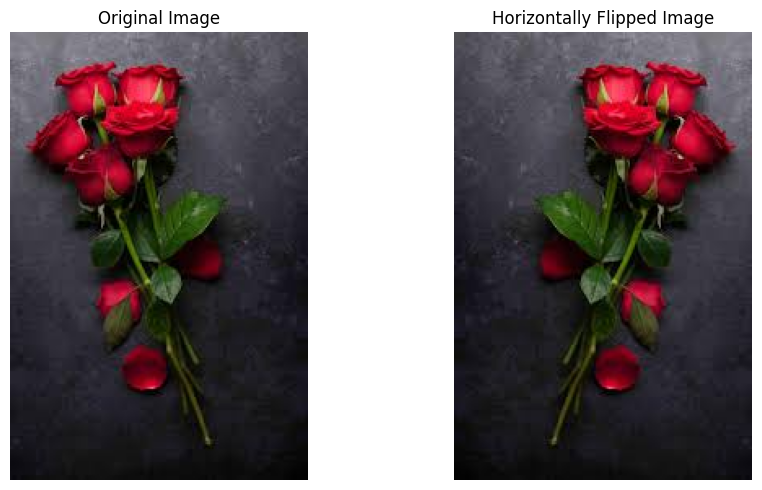

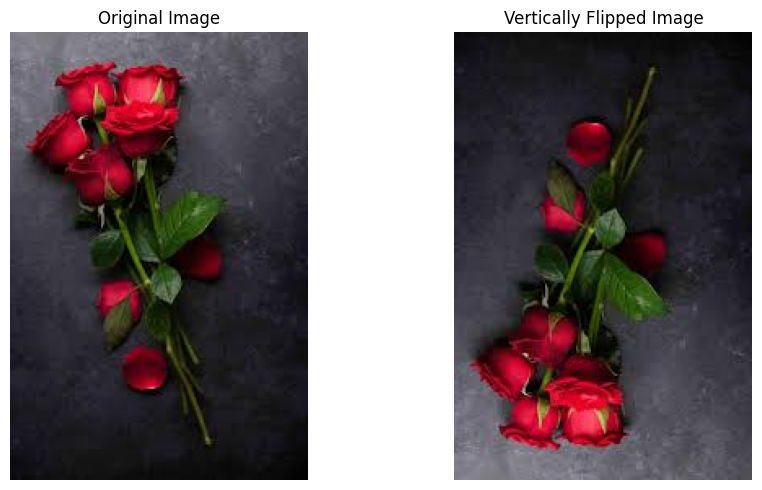

In [54]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
def compare(image1, image2, title1, title2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image1)
    plt.title(title1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(image2)
    plt.title(title2)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
Rose = imread("/content/rose.jpeg")
horizontal_flipped = np.fliplr(Rose)
vertical_flipped = np.flipud(Rose)
compare(Rose, horizontal_flipped, "Original Image", "Horizontally Flipped Image")
compare(Rose, vertical_flipped, "Original Image", "Vertically Flipped Image")


## **2.10 Histrograms of different colour Chanels**

In [55]:
def plot_with_hist_channel(image, channel):
    channels = ["red", "green", "blue"]
    channel_idx = channels.index(channel)
    color = channels[channel_idx]
    extracted_channel = image[:, :, channel_idx]
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(9, 5)
    )
    ax1.imshow(image)
    ax1.axis("off")
    ax2.hist(extracted_channel.ravel(), bins=256, color=color)
    ax2.set_xlim([0, 100])
    ax2.set_title(f"{channels[channel_idx]} histogram")

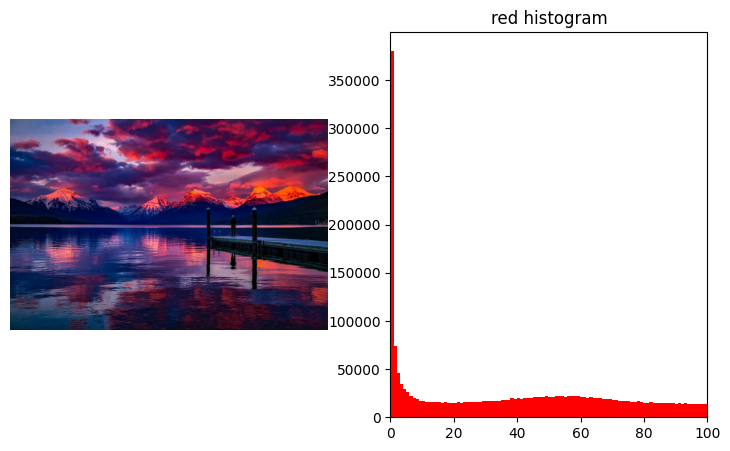

In [56]:
colorful_scenery = imread("/content/scenery.jpg")
plot_with_hist_channel(colorful_scenery, "red")

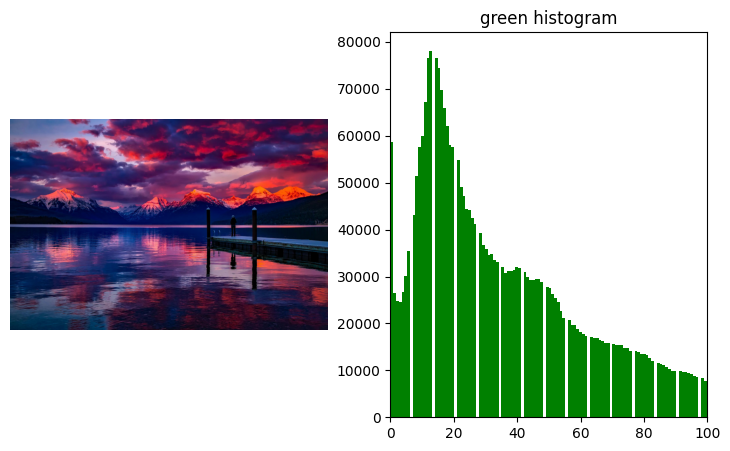

In [57]:
plot_with_hist_channel(colorful_scenery, "green")

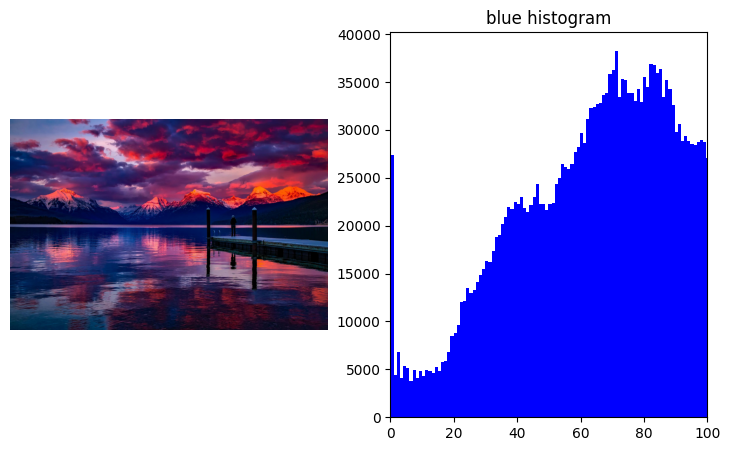

In [58]:
plot_with_hist_channel(colorful_scenery, "blue")